In [ ]:
import json
list_of_data = []
while True:
  tag = input("Tag: ")
  if tag != "":
    pattern_list = []
    while True:
      pattern_input = input(f"Please enter patterns for {tag}: ")
      if pattern_input != "":
        pattern_list.append(pattern_input)
      else:
        print("Saving patterns...")
        break
    response_list = []
    while True:
      response_input = input(f"Please enter responses for {tag}: ")
      if response_input != "":
        response_list.append(response_input)
      else:
        print("Saving responses")
        break
    list_of_data.append({"tag": tag, "patterns": pattern_list, "responses": response_list})
  else:
    intents = {"intents":list_of_data}
    json.dump(intents, open("intents.json", "w"), indent=4)
    print("Saving intents file...")
    break

Tag: greetings
Please enter patterns for greetings: hello
Please enter patterns for greetings: how are you
Please enter patterns for greetings: good morning
Please enter patterns for greetings: hey there
Please enter patterns for greetings: whats up
Please enter patterns for greetings: yo
Please enter patterns for greetings: salam alykum
Please enter patterns for greetings: 
Saving patterns...
Please enter responses for greetings: Hello, there! How can I help you today?
Please enter responses for greetings: Hey! How can I help you?
Please enter responses for greetings: 
Saving responses
Tag: 
Saving intents file...


# Run this code to talk to chatbot

**Random** : To shuffle the training data

**Json** : To read json file (intents.json)

**pickle** : To save files that we create along the way

**numpy** : For mathematical calculations using matrices

**tensorflow** : To create neural networks

In [ ]:
import random, json, pickle, numpy as np, nltk, tensorflow as tf

To download required natural language processing packages

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We import word net lemmatizer for 2 reasons:
1. Text normalization (eg: converting "running", "ran" etc to "run")
2. Reducing the size of the vovabulary

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
intents = json.load(open('./intents.json'))
print(type(intents))
print(intents)

<class 'dict'>
{'intents': [{'tag': 'greetings', 'patterns': ['hey there!', 'hello', 'how are you', 'Whats up', 'How are you doing?', 'good evening'], 'responses': ['Hello, how can I help you today?', 'Hey there, good to meet you! how can I help you today?']}, {'tag': 'coffee', 'patterns': ['What type of coffee do you sell?', 'what are the types of coffee that you make?'], 'responses': ['We have Cappuccino, Latte, Arabica and Iced coffee.']}, {'tag': 'order', 'patterns': ['how can i place order?', 'how do i place an order for my coffee?'], 'responses': ['You can visit our website www.coffee.com/placeOrder and place your order online.']}, {'tag': 'services', 'patterns': ['What can you do for me?', 'What all things can you do?', 'how can you help me?'], 'responses': ['I can tell you the type of coffees we serve and how you can place an order.']}, {'tag': 'good bye', 'patterns': ['bye', 'see you later', 'thank you for helping me'], 'responses': ['Bye!', 'Good bye!']}]}


**patterns_key** : Key used to convert patterns between *sentences* and 0's and 1's

**tags_key** : Key used to convert tags between *sentences* and 0's and 1's

**pattern_tag_combination** : A list containing combination of patterns and tags.

**ignore_letters** : letters to be ignored while lemmatizing.

In [ ]:
patterns_key, tags_key, pattern_tag_combination = [], [], []
ignore_letters = ["?", "!", ",", "'", "."]

In [ ]:
def tokenize_and_clean(sentence):
  tokenized_sentence = nltk.word_tokenize(sentence)
  tokenized_sentence = [lemmatizer.lemmatize(word.lower()) for word in tokenized_sentence if word not in ignore_letters]
  return tokenized_sentence

In [ ]:
print(nltk.word_tokenize("Hey how are you?"))

['Hey', 'how', 'are', 'you', '?']


In [ ]:
list_of_patterns = []
for intent in intents["intents"]:
  for pattern in intent["patterns"]:
    list_of_patterns.extend(tokenize_and_clean(pattern))
patterns_key = sorted(set(list_of_patterns))
print(patterns_key)
print(len(patterns_key))

['all', 'an', 'are', 'bye', 'can', 'coffee', 'do', 'doing', 'evening', 'for', 'good', 'hello', 'help', 'helping', 'hey', 'how', 'i', 'later', 'make', 'me', 'my', 'of', 'order', 'place', 'see', 'sell', 'thank', 'that', 'the', 'there', 'thing', 'type', 'up', 'what', 'whats', 'you']
36


In [ ]:
list_of_tags = []
for intent in intents["intents"]:
  tag = intent['tag']
  list_of_tags.append(tag)
tags_key = sorted(set(list_of_tags))
print(tags_key)

['coffee', 'good bye', 'greetings', 'order', 'services']


In [ ]:
for intent in intents["intents"]:
  for pattern in intent["patterns"]:
    pattern_tag_combination.append((tokenize_and_clean(pattern), intent['tag']))
print(pattern_tag_combination)

[(['hey', 'there'], 'greetings'), (['hello'], 'greetings'), (['how', 'are', 'you'], 'greetings'), (['whats', 'up'], 'greetings'), (['how', 'are', 'you', 'doing'], 'greetings'), (['good', 'evening'], 'greetings'), (['what', 'type', 'of', 'coffee', 'do', 'you', 'sell'], 'coffee'), (['what', 'are', 'the', 'type', 'of', 'coffee', 'that', 'you', 'make'], 'coffee'), (['how', 'can', 'i', 'place', 'order'], 'order'), (['how', 'do', 'i', 'place', 'an', 'order', 'for', 'my', 'coffee'], 'order'), (['what', 'can', 'you', 'do', 'for', 'me'], 'services'), (['what', 'all', 'thing', 'can', 'you', 'do'], 'services'), (['how', 'can', 'you', 'help', 'me'], 'services'), (['bye'], 'good bye'), (['see', 'you', 'later'], 'good bye'), (['thank', 'you', 'for', 'helping', 'me'], 'good bye')]


In [ ]:
def convert_to_bag(sentence, key):
  bag = []
  for word in key:
    bag.append(1) if word in sentence else bag.append(0)
  return bag

In [ ]:
print(convert_to_bag("how are you", patterns_key))

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
binary_pattern_tag_combination = []

for element in pattern_tag_combination:
  pattern = element[0]
  tag = element[1]

  binary_pattern_tag_combination.append([convert_to_bag(pattern, patterns_key), convert_to_bag(tag, tags_key)])

print(binary_pattern_tag_combination)

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0]], [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 0]], [[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0]], [[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 0]], [[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1

In [ ]:
random.shuffle(binary_pattern_tag_combination)
training = np.array(binary_pattern_tag_combination)
train_x = np.array(list(training[:, 0]))
train_y = np.array(list(training[:, 1]))
print(train_x)
print(train_y)

In [ ]:
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print(type(train_x))

<class 'list'>


In [ ]:
numpy_array = [np.array()]

In [ ]:
print(train_x)

[[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1

In [ ]:
print(len(train_x[0]), len(patterns_key))

36 36


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_y[0]), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, epochs=300)

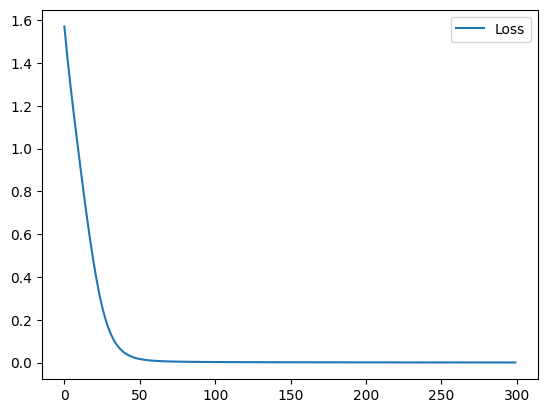

In [ ]:
# Optional checking loss and accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

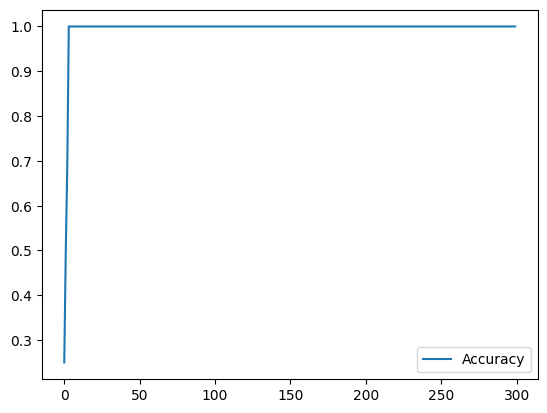

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save("chatbot.model")

In [ ]:
def respond(tag):
  for intent in intents["intents"]:
    if intent["tag"] == tag:
      return random.choice(intent["responses"])

In [ ]:
while True:
  user_pattern = input("You: ")
  if user_pattern == "":
    break
  else:
    user_pattern = tokenize_and_clean(user_pattern)
    binary_user_pattern = convert_to_bag(user_pattern, patterns_key)
    tag = model.predict(np.array([binary_user_pattern]))[0]
    tag = tags_key[np.argmax(tag)]
    print(f"Bot: {respond(tag)}")

You: hey
1/1 [==============================] - 0s 88ms/step
Bot: Hello, how can I help you today?
You: 
